In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from src.feature_selection import *

In [2]:
# import zipfile
# with zipfile.ZipFile("data/statslib.zip","r") as zip_ref:
#     zip_ref.extractall(".")

In [3]:
df = pd.read_csv('data/housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Columns
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per USD 10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in USD 1000's

## Feature Selection

Feature selection can be divided into unsupervised and supervised method. Unsupervised method ignores target variable by removing the redundant values, whereas supervised method does consider the target variable and determine which features are related to the target variable.\
As our project primarily focuses on the price movement, we need a target value. Corresponding to the another dataset, we will use housing price as the target variable. In this section, we determine the correlated features depending on the target. 
\
Supervised method for feature selection can be divided into wrapper and filter methods. Wrapper method can be used for any type of entires and creates subsets of input features, whereas filter method uses statistical techniques to determine the relationships between a feature and a target variable.\
This dataset contains only numerical variables (CHAS is originally categorical variable, but it's now converted to 0/1) and price can be considered as a continuous variables in this context. Therefore, we will use filter method.

As we want to knowthe features that are strongly correlated, we take the absolute values for all correlation coefficients and consider the values greater than 0.5 as "strong correlation" to the target value. 

Columns in data....Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


/Users/manami/MATH4025/src/feature_selection.py:25: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if df.values == 'nan':


Selected features wrt MEDV

['RM', 'PTRATIO', 'LSTAT', 'MEDV']


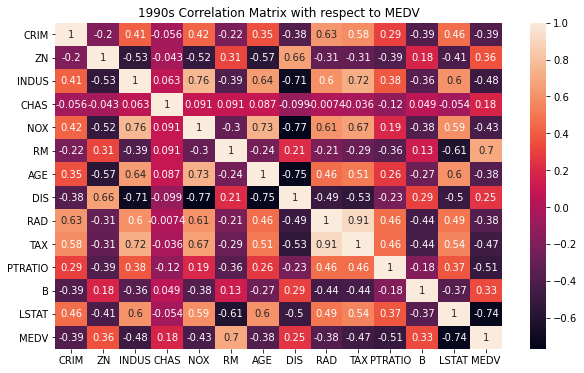

In [4]:
## the target value = MEDV
target = 'MEDV'
selected_feature = select_features(df, target)